In [7]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, norm
import statsmodels.api as sm
from scipy.stats import kruskal
import scikit_posthocs as sp
import pingouin as pg

## Data Cleaning

In [9]:
df=pd.read_excel('Hypothesis_2.xlsx')
df=df.dropna(axis=0)
df['maximum SVL'] = pd.to_numeric(df['maximum SVL'], errors='coerce')
df = df.dropna(subset=['maximum SVL'])
df['female SVL'] = pd.to_numeric(df['female SVL'], errors='coerce')
df = df.dropna(subset=['female SVL'])
df

,Binomial,main biogeographic Realm,maximum SVL,female SVL,smallest clutch,largest clutch
0,Ablepharus bivittatus,Palearctic,61.0,56.5,2.0,5.0
1,Ablepharus budaki,Palearctic,48.0,36.8,2.0,5.0
2,Ablepharus chernovi,Palearctic,54.0,44.4,3.0,4.0
4,Ablepharus deserti,Palearctic,58.8,46.0,1.0,8.0
6,Ablepharus kitaibelii,Palearctic,58.0,43.4,2.0,6.0
...,...,...,...,...,...,...
6630,Xenosaurus tzacualtipantecus,Neotropic,122.0,101.9,5.0,5.0
6632,Zonosaurus anelanelany,Madagascar,93.0,86.5,7.0,7.0
6633,Zonosaurus bemaraha,Madagascar,75.0,67.0,7.0,7.0
6648,Zootoca vivipara,Palearctic,77.0,61.0,1.0,16.0


<Axes: xlabel='maximum SVL', ylabel='Count'>

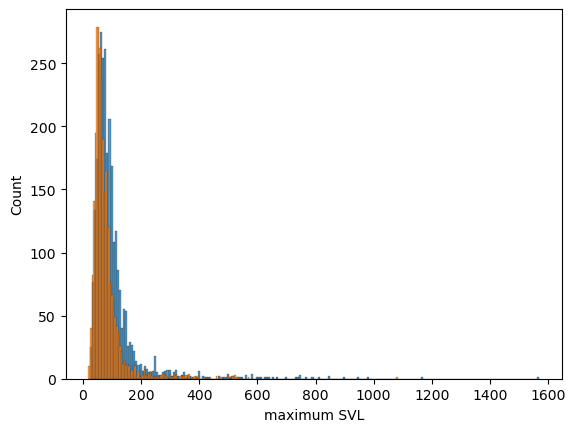

In [10]:
sns.histplot(data=df,x=df['maximum SVL'])
sns.histplot(data=df,x=df['female SVL'])

<Axes: xlabel='smallest clutch', ylabel='Count'>

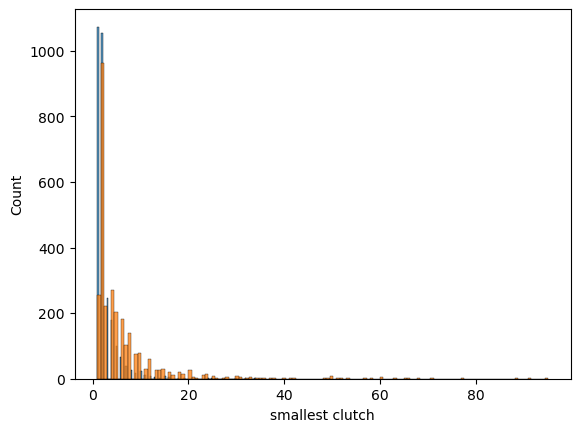

In [11]:
sns.histplot(data=df,x=df['smallest clutch'])
sns.histplot(data=df,x=df['largest clutch'])

In [12]:
outliers=[]
def detect_outliers(data):
    threshold=2
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [13]:
outliers=detect_outliers(df['maximum SVL'])
outliers_f=detect_outliers(df['female SVL'])
outliers_clutch_small=detect_outliers(df['smallest clutch'])
outliers_clutch_largest=detect_outliers(df['largest clutch'])

In [14]:
df_clean = df[~df['maximum SVL'].isin(outliers)]
df_clean = df[~df['female SVL'].isin(outliers_f)]

df_clean = df[~df['smallest clutch'].isin(outliers_clutch_small)]
df_clean = df[~df['largest clutch'].isin(outliers_clutch_largest)]
df_clean

,Binomial,main biogeographic Realm,maximum SVL,female SVL,smallest clutch,largest clutch
0,Ablepharus bivittatus,Palearctic,61.0,56.5,2.0,5.0
1,Ablepharus budaki,Palearctic,48.0,36.8,2.0,5.0
2,Ablepharus chernovi,Palearctic,54.0,44.4,3.0,4.0
6,Ablepharus kitaibelii,Palearctic,58.0,43.4,2.0,6.0
9,Ablepharus rueppellii,Palearctic,52.0,35.3,1.0,6.0
...,...,...,...,...,...,...
6628,Xenosaurus rackhami,Neotropic,120.0,110.9,2.0,7.0
6629,Xenosaurus rectocollaris,Neotropic,111.0,97.5,1.0,7.0
6630,Xenosaurus tzacualtipantecus,Neotropic,122.0,101.9,5.0,5.0
6632,Zonosaurus anelanelany,Madagascar,93.0,86.5,7.0,7.0


In [15]:
df_clean['main biogeographic Realm'].value_counts()

main biogeographic Realm
Neotropic     672
Oriental      378
Australia     291
Afrotropic    270
Oceania       234
Palearctic    221
Madagascar     93
Nearctic       79
Name: count, dtype: int64

In [16]:
df_clean = df_clean[df_clean['maximum SVL'] > 0].copy()
df_clean.loc[:, 'SVL_log'] = np.log(df_clean['maximum SVL'])
df_clean = df_clean[df_clean['female SVL'] > 0].copy()
df_clean.loc[:, 'female_SVL_log'] = np.log(df_clean['female SVL'])
df_clean = df_clean[df_clean['smallest clutch'] > 0].copy()

<Axes: xlabel='female_SVL_log', ylabel='Count'>

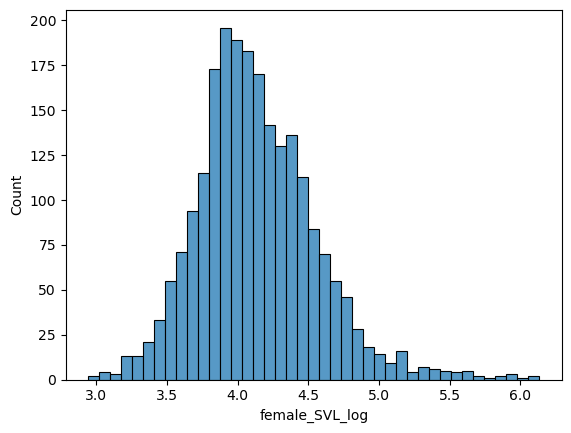

In [17]:
sns.histplot(data=df_clean,x=df_clean['female_SVL_log'])

<Axes: xlabel='SVL_log', ylabel='Count'>

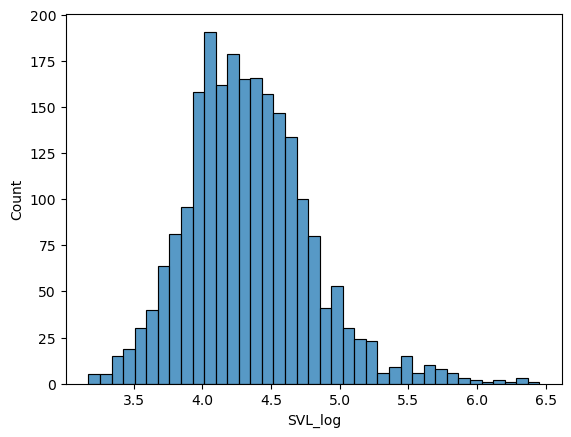

In [18]:
sns.histplot(data=df_clean,x=df_clean['SVL_log'])

In [19]:
df_clean['sqrt_small_clutch'] = np.sqrt(df_clean['smallest clutch'])
df_clean['sqrt_large_clutch'] = np.sqrt(df_clean['largest clutch'])

<Axes: xlabel='sqrt_large_clutch', ylabel='Count'>

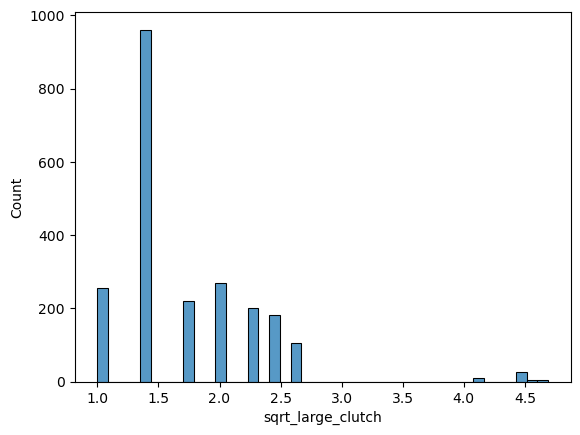

In [20]:
sns.histplot(data=df_clean,x=df_clean['sqrt_large_clutch'])

<Axes: xlabel='sqrt_large_clutch', ylabel='Count'>

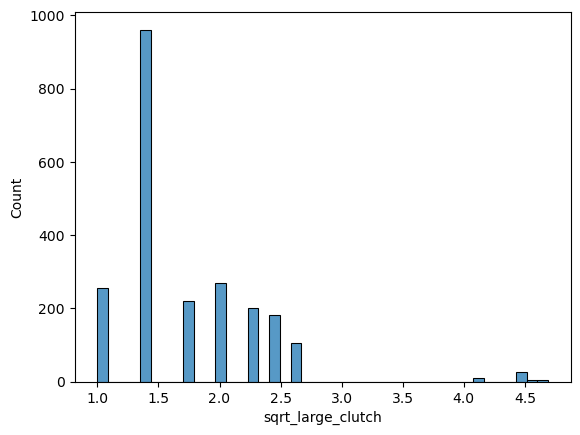

In [21]:
sns.histplot(data=df_clean,x=df_clean['sqrt_large_clutch'])

## Checking Normality

In [23]:
data=df_clean['sqrt_small_clutch']
data_std = (data - np.mean(data)) / np.std(data)
stat, p = kstest(data_std, 'norm')
print(f"K-S statistic = {stat:.4f}, p-value = {p:.4f}")

if p > 0.05:
    print("Data follow a normal distribution (fail to reject H0).")
else:
    print(" Data do not follow a normal distribution (reject H0).")

K-S statistic = 0.2464, p-value = 0.0000
 Data do not follow a normal distribution (reject H0).


## Kruskal-Wallis ANOVA test

In [25]:
groups = [group['largest clutch'].values for name, group in df_clean.groupby('main biogeographic Realm')]

In [26]:
H_stat, p_value = kruskal(*groups)

In [27]:
print(f"Kruskal–Wallis H-statistic: {H_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Kruskal–Wallis H-statistic: 179.0776
p-value: 0.0000


In [28]:
if p_value < 0.05:
    print(" Significant difference in clutch size among biogeographic realms (p < 0.05).")
else:
    print(" No significant difference in clutch size among biogeographic realms (p ≥ 0.05).")

 Significant difference in clutch size among biogeographic realms (p < 0.05).


## Dunn's Post Hoc Test

In [30]:
posthoc = pg.pairwise_tests(data=df_clean,
                            dv='largest clutch',
                            between='main biogeographic Realm',
                            parametric=False,    
                            padjust='bonferroni')
print("Post-hoc Dunn’s (Pairwise) Test Results:")
print(posthoc[['A', 'B', 'U-val', 'p-unc', 'p-corr', 'p-adjust']])

Post-hoc Dunn’s (Pairwise) Test Results:
             A           B     U-val         p-unc        p-corr    p-adjust
0   Afrotropic   Australia   35896.5  6.266340e-02  1.000000e+00  bonferroni
1   Afrotropic  Madagascar   14109.0  5.517245e-02  1.000000e+00  bonferroni
2   Afrotropic    Nearctic    5807.0  1.587716e-10  4.445604e-09  bonferroni
3   Afrotropic   Neotropic  107966.5  2.346949e-06  6.571458e-05  bonferroni
4   Afrotropic     Oceania   36755.5  6.240304e-04  1.747285e-02  bonferroni
5   Afrotropic    Oriental   53770.0  2.057430e-01  1.000000e+00  bonferroni
6   Afrotropic  Palearctic   23513.5  2.804798e-05  7.853435e-04  bonferroni
7    Australia  Madagascar   16564.0  5.319576e-04  1.489481e-02  bonferroni
8    Australia    Nearctic    6696.0  4.043979e-09  1.132314e-07  bonferroni
9    Australia   Neotropic  123578.5  1.937932e-11  5.426209e-10  bonferroni
10   Australia     Oceania   42966.5  3.314411e-08  9.280352e-07  bonferroni
11   Australia    Oriental   63330.

In [31]:
posthoc = sp.posthoc_dunn(df_clean, val_col='largest clutch', group_col='main biogeographic Realm', p_adjust='bonferroni')
print("\nPost-hoc Dunn’s Test (p-values):")
print(posthoc)


Post-hoc Dunn’s Test (p-values):
              Afrotropic     Australia    Madagascar      Nearctic  \
Afrotropic  1.000000e+00  1.000000e+00  1.000000e+00  1.198969e-08   
Australia   1.000000e+00  1.000000e+00  6.537884e-02  8.657202e-06   
Madagascar  1.000000e+00  6.537884e-02  1.000000e+00  1.053486e-09   
Nearctic    1.198969e-08  8.657202e-06  1.053486e-09  1.000000e+00   
Neotropic   6.256184e-05  7.922171e-11  1.000000e+00  2.701239e-20   
Oceania     3.902177e-02  2.058688e-05  1.000000e+00  2.242083e-15   
Oriental    1.000000e+00  5.774689e-02  1.000000e+00  1.804993e-11   
Palearctic  1.565518e-03  4.314067e-01  7.939780e-05  2.669156e-02   

               Neotropic       Oceania      Oriental    Palearctic  
Afrotropic  6.256184e-05  3.902177e-02  1.000000e+00  1.565518e-03  
Australia   7.922171e-11  2.058688e-05  5.774689e-02  4.314067e-01  
Madagascar  1.000000e+00  1.000000e+00  1.000000e+00  7.939780e-05  
Nearctic    2.701239e-20  2.242083e-15  1.804993e-11  2.669

# Regression alalysis

In [33]:
df_clean.head()

,Binomial,main biogeographic Realm,maximum SVL,female SVL,smallest clutch,largest clutch,SVL_log,female_SVL_log,sqrt_small_clutch,sqrt_large_clutch
0,Ablepharus bivittatus,Palearctic,61.0,56.5,2.0,5.0,4.110874,4.034241,1.414214,2.236068
1,Ablepharus budaki,Palearctic,48.0,36.8,2.0,5.0,3.871201,3.605498,1.414214,2.236068
2,Ablepharus chernovi,Palearctic,54.0,44.4,3.0,4.0,3.988984,3.793239,1.732051,2.000000
6,Ablepharus kitaibelii,Palearctic,58.0,43.4,2.0,6.0,4.060443,3.770459,1.414214,2.449490
9,Ablepharus rueppellii,Palearctic,52.0,35.3,1.0,6.0,3.951244,3.563883,1.000000,2.449490


In [34]:
df_clean[['maximum SVL', 'largest clutch']].describe()

,maximum SVL,largest clutch
count,2238.000000,2238.000000
mean,86.380161,3.396783
std,52.937703,2.850755
min,23.800000,1.000000
25%,57.000000,2.000000
50%,74.550000,2.000000
75%,99.175000,4.000000
max,635.000000,22.000000


In [35]:
X = df_clean['maximum SVL']
y = df_clean['largest clutch']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         largest clutch   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     309.6
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           5.36e-65
Time:                        06:01:15   Log-Likelihood:                -5374.5
No. Observations:                2238   AIC:                         1.075e+04
Df Residuals:                    2236   BIC:                         1.076e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.7747      0.108     16.413      

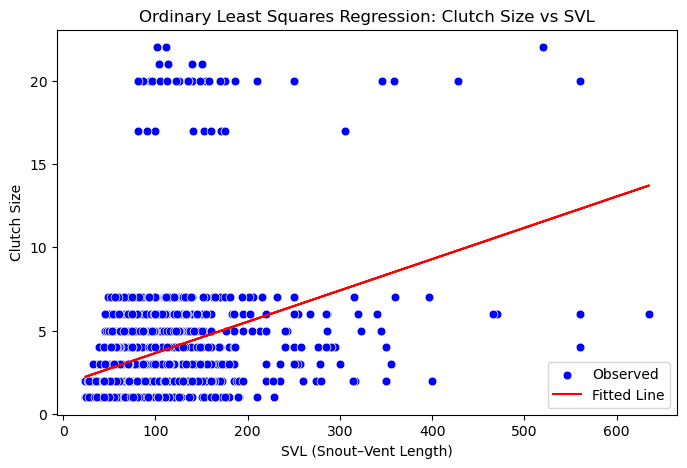

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_clean['maximum SVL'], y=df_clean['largest clutch'], s=40, color='blue', label='Observed')
plt.plot(df_clean['maximum SVL'], model.predict(X), color='red', label='Fitted Line')
plt.xlabel("SVL (Snout–Vent Length)")
plt.ylabel("Clutch Size")
plt.title("Ordinary Least Squares Regression: Clutch Size vs SVL")
plt.legend()
plt.show()

In [37]:
X = df_clean['female SVL']
y = df_clean['smallest clutch']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        smallest clutch   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     141.4
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           1.18e-31
Time:                        06:01:15   Log-Likelihood:                -3656.3
No. Observations:                2238   AIC:                             7317.
Df Residuals:                    2236   BIC:                             7328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3634      0.053     25.519      0.0

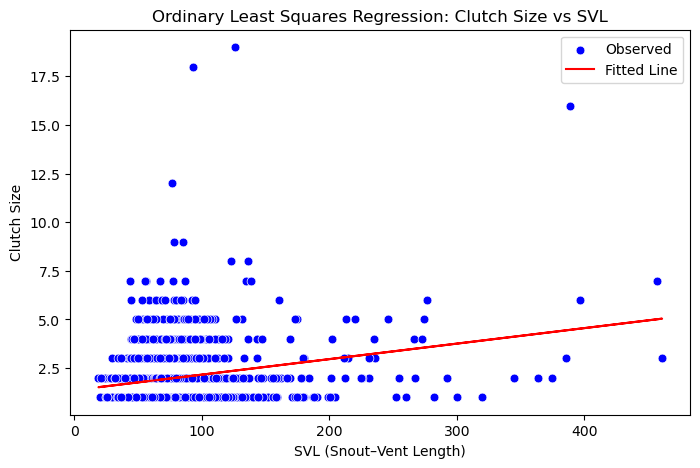

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_clean['female SVL'], y=df_clean['smallest clutch'], s=40, color='blue', label='Observed')
plt.plot(df_clean['female SVL'], model.predict(X), color='red', label='Fitted Line')
plt.xlabel("SVL (Snout–Vent Length)")
plt.ylabel("Clutch Size")
plt.title("Ordinary Least Squares Regression: Clutch Size vs SVL")
plt.legend()
plt.show()